In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm

pi = np.pi
sns.set_theme(palette='muted',font_scale=1.3)
plt.rcParams.update({'font.size': 20})

In [2]:
df = pd.read_csv('./data/train_set.csv', index_col=0)
cols = df.columns
idxs = df.index

In [3]:
cols = df.columns
col_genes = []
for i in range(len(cols)):
    col = cols[i]
    if '+' in col:
        split = col.split('+')
        col_genes.append(split[0])
        col_genes.append(split[1])
    else:
        col_genes.append(col)

In [4]:
singles = [x for x in cols if 'ctrl' in x]
singles.sort()
singles

['ctrl',
 'ctrl.1',
 'ctrl.10',
 'ctrl.11',
 'ctrl.12',
 'ctrl.13',
 'ctrl.14',
 'ctrl.15',
 'ctrl.16',
 'ctrl.17',
 'ctrl.18',
 'ctrl.19',
 'ctrl.2',
 'ctrl.20',
 'ctrl.21',
 'ctrl.22',
 'ctrl.23',
 'ctrl.24',
 'ctrl.25',
 'ctrl.26',
 'ctrl.27',
 'ctrl.28',
 'ctrl.29',
 'ctrl.3',
 'ctrl.30',
 'ctrl.31',
 'ctrl.32',
 'ctrl.33',
 'ctrl.34',
 'ctrl.35',
 'ctrl.36',
 'ctrl.37',
 'ctrl.38',
 'ctrl.39',
 'ctrl.4',
 'ctrl.5',
 'ctrl.6',
 'ctrl.7',
 'ctrl.8',
 'ctrl.9',
 'g0013+ctrl',
 'g0013+ctrl.1',
 'g0013+ctrl.10',
 'g0013+ctrl.11',
 'g0013+ctrl.12',
 'g0013+ctrl.13',
 'g0013+ctrl.14',
 'g0013+ctrl.15',
 'g0013+ctrl.16',
 'g0013+ctrl.17',
 'g0013+ctrl.18',
 'g0013+ctrl.19',
 'g0013+ctrl.2',
 'g0013+ctrl.20',
 'g0013+ctrl.21',
 'g0013+ctrl.22',
 'g0013+ctrl.23',
 'g0013+ctrl.24',
 'g0013+ctrl.25',
 'g0013+ctrl.26',
 'g0013+ctrl.27',
 'g0013+ctrl.28',
 'g0013+ctrl.29',
 'g0013+ctrl.3',
 'g0013+ctrl.30',
 'g0013+ctrl.31',
 'g0013+ctrl.32',
 'g0013+ctrl.33',
 'g0013+ctrl.34',
 'g0013+ctrl.35'

In [5]:
controls = [x for x in cols if (('ctrl' in x) & ('+' not in x))]
controls_df = df[controls]
controls_df

,ctrl,ctrl.1,ctrl.2,ctrl.3,ctrl.4,ctrl.5,ctrl.6,ctrl.7,ctrl.8,ctrl.9,...,ctrl.30,ctrl.31,ctrl.32,ctrl.33,ctrl.34,ctrl.35,ctrl.36,ctrl.37,ctrl.38,ctrl.39
g0001,0.836312,0.028914,0.000000,1.143639,0.017690,0.753267,0.621105,0.995904,0.444173,0.000000,...,0.000000,0.021107,0.000000,0.005619,0.540809,0.516010,0.000000,0.477841,0.008036,0.000480
g0002,0.511849,0.000000,0.021841,0.005361,0.000000,0.000000,1.039343,0.011422,0.008642,0.001953,...,0.009748,0.709725,0.000000,0.000000,0.545621,0.000000,0.557010,0.000000,0.000000,0.005811
g0003,1.445944,2.079188,1.822911,0.012007,1.845350,1.717792,1.531284,2.137802,1.338088,2.104632,...,1.252130,1.258434,1.486947,1.863053,1.690039,1.522627,1.795411,1.429553,1.666555,1.782848
g0004,0.008603,0.000000,0.007871,0.000000,0.663040,0.761658,1.309351,0.968819,0.456875,0.476410,...,0.474979,0.408065,0.000000,0.000000,0.000000,0.881550,1.144585,1.074318,0.807167,0.476822
g0005,1.281513,1.501341,0.457483,0.000000,1.353445,0.000000,1.305790,1.254025,1.314771,1.045982,...,0.487891,1.100946,0.000000,1.310409,0.897603,1.488739,1.363504,1.682196,1.053755,0.791593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g0996,0.018538,0.017372,0.013594,0.009003,0.018923,0.000000,0.000000,0.013630,0.009968,0.000242,...,0.009389,0.016470,0.000000,0.010173,0.533368,0.009927,0.000000,0.002585,0.796480,0.014837
g0997,0.000000,0.000508,0.000000,0.000000,0.000000,0.000000,0.000000,0.021748,0.000000,0.000000,...,0.000000,0.412149,0.000000,0.019934,0.540004,0.004373,0.000000,0.514076,0.496634,0.463396
g0998,0.003903,0.626856,0.459044,1.663666,0.000000,0.000842,1.018301,0.616122,0.446489,0.476186,...,1.068554,0.693600,0.627586,0.508985,0.007223,0.532241,0.552268,0.006807,1.018918,1.239211
g0999,0.495759,1.003602,1.004071,0.002175,0.384393,0.738528,0.650028,0.007703,0.984047,0.789448,...,0.487926,0.682713,1.278457,0.866744,0.541227,0.009994,0.902098,0.006311,1.023055,0.798029


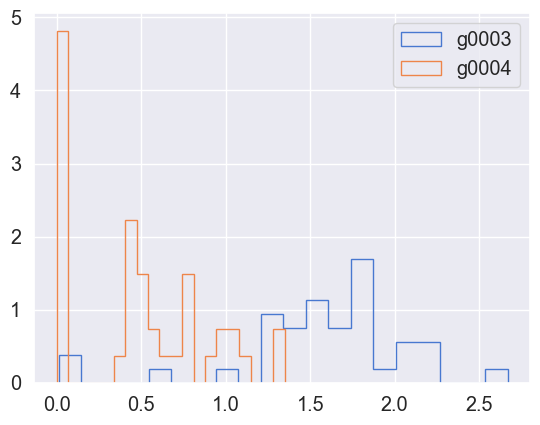

In [14]:
fig, ax = plt.subplots()
for i in range(2,4):
    row = idxs[i]
    ax.hist(controls_df.loc[row], bins=20, density=True, histtype='step', label=row)
    ax.legend();

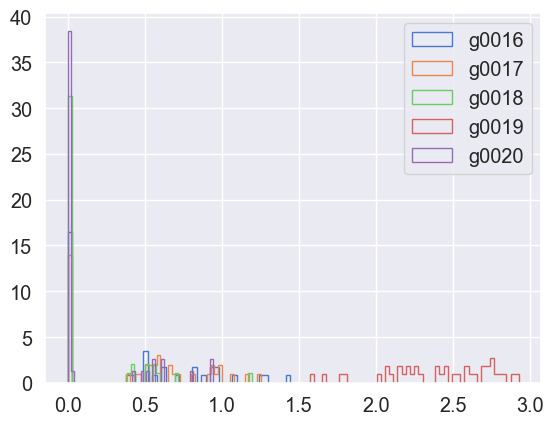

In [51]:
c13 = [x for x in cols if 'g0013+ctrl' in x]

fig, ax = plt.subplots()
for i in range(15,20):
    row = idxs[i]
    ax.hist(df[c13].loc[row], bins=50, density=True, histtype='step', label=row)
    ax.legend();

In [19]:
pmask = ['.' in col for col in cols]
copies = cols[pmask]
copies

Index(['g0232+ctrl.1', 'g0852+ctrl.1', 'g0160+g0495.1', 'g0534+g0612.1',
       'g0301+ctrl.1', 'g0013+ctrl.1', 'g0927+g0805.1', 'g0852+ctrl.2',
       'g0200+g0605.1', 'g0844+ctrl.1',
       ...
       'g0261+g0013.39', 'g0186+g0868.39', 'g0228+g0780.39', 'g0186+g0216.39',
       'g0520+ctrl.39', 'g0927+g0852.39', 'g0671+ctrl.39', 'g0301+g0139.39',
       'g0843+ctrl.39', 'g0061+ctrl.39'],
      dtype='object', length=6903)

""
g0037+g0083
g0083+g0605
g0095+g0257
g0095+g0520
g0109+g0317
g0109+g0965
g0136+g0965
g0160+g0301
g0160+g0751
g0186+g0241
